In [67]:
# Packages
import pandas as pd 
import numpy as np 
import datetime 
import matplotlib.pyplot as plt 

In [ ]:
# DataFrames
df1_Cin_NKY_W = pd.read_csv('Weather_Datasets/Weather_Data-Cinci_NKY_Weather.csv')
df2_Louis_W = pd.read_csv('Weather_Datasets/Louisville_Weather_CSV.csv') 
df3_NYC_W = pd.read_csv('Weather_Datasets/New_York_Weather.csv')
df4_LA_W = pd.read_csv('Weather_Datasets/Los_Angeles_Weather.csv') 

# Set datetime
df1_Cin_NKY_W['DATE'] = pd.to_datetime(df1_Cin_NKY_W['DATE']) # Datetime() module allows the user to work with dates as objects. 
df2_Louis_W['DATE'] = pd.to_datetime(df2_Louis_W['DATE']) 
df3_NYC_W['DATE'] = pd.to_datetime(df3_NYC_W['DATE'])
df4_LA_W['DATE'] = pd.to_datetime(df4_LA_W['DATE']) 

In [69]:
df1_Cin_NKY_W.head() # The head() function by default displays the first five rows in a particular dataframe. 

,NAME,LATITUDE,LONGITUDE,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-01,1.01,0.0,58,64,52
1,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-02,0.20,0.0,41,52,28
2,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-03,0.00,0.0,27,33,21
3,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-04,0.00,0.0,29,44,21
4,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-05,0.00,0.0,42,47,22


In [70]:
df3_NYC_W.tail() # The tail() function by default displays the last five rows in a particular datafarame. 

,NAME,LATITUDE,LONGITUDE,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
360,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-27,0.00,0.0,30,35,28
361,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-28,0.00,0.0,36,45,27
362,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-29,0.00,0.0,39,46,32
363,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-30,0.00,0.0,42,51,34
364,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-31,0.27,0.0,46,51,41


In [71]:
#Undersdanding Cinci/NKY Data 
column_list = df1_Cin_NKY_W.columns # The columns function returns the label in each dataframe.
print(column_list) 
data_types = df1_Cin_NKY_W.dtypes # The dtypes function describes aspects of the data.
print(data_types) 
Cinci_shape = df1_Cin_NKY_W.shape # The shape function lets the user know the number of rows and columns in the dataframe
print(Cinci_shape) 

Index(['NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP', 'SNOW', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')
NAME                 object
LATITUDE            float64
LONGITUDE           float64
DATE         datetime64[ns]
PRCP                float64
SNOW                float64
TAVG                  int64
TMAX                  int64
TMIN                  int64
dtype: object
(365, 9)


In [72]:
# Renaming Cincinnati/Northern KY Columns 
df1_Cin_NKY_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True)  
# The rename function is used to alter the name of a colum in each dataset.
# The inplace = True argument makes changes permanent.  


# Deleting Columns for Cincinnati/Northern KY dataframe
df1_Cin_NKY_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) # The drop() function removes rows or colums by specifing label names.

In [106]:
# Calculations for Cincinnati/Northern Ky
Cin_NKY_monthly_mean = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean() # The mean() function is used to calulate the mean (average) for the 'HIGH', 'LOW', and 'AVERAGE' columns.
Cin_NKY_monthly_max = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['HIGH']].max() # The max() function returns the highest value for each of the 'HIGH', 'LOW', and 'AVERAGE' columns.
Cin_NKY_monthly_min = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['LOW']].min() # The min() function returns the lowest value for each of the 'HIGH', 'LOW', and 'AVERAGE' columns.
Cin_NKY_monthly_sum = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum() # The sum() functions adds the values for each of the 'HIGH', 'LOW', and 'AVERAGE' columns.

In [74]:
df1_Cin_NKY_W.head(7) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-01,1.01,0.0,58,64,52
1,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-02,0.20,0.0,41,52,28
2,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-03,0.00,0.0,27,33,21
3,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-04,0.00,0.0,29,44,21
4,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-05,0.00,0.0,42,47,22
5,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-06,0.05,0.7,21,23,16
6,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-07,0.00,0.0,15,17,11


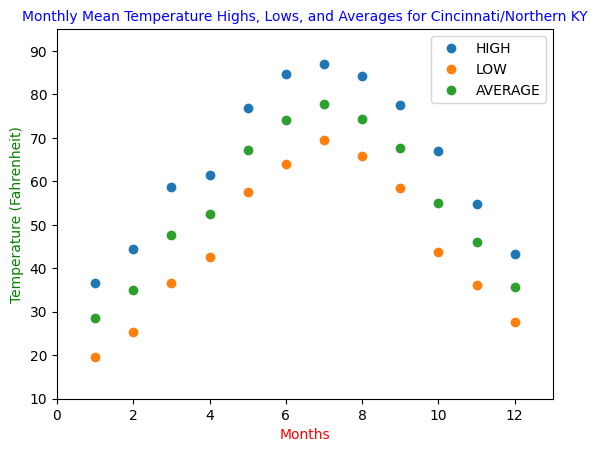

,HIGH,LOW,AVERAGE
DATE,,,
1,36.65,19.68,28.55
2,44.39,25.32,35.00
3,58.74,36.65,47.55
4,61.53,42.70,52.47
5,76.90,57.52,67.26
6,84.63,63.90,74.17
7,86.90,69.42,77.87
8,84.16,65.94,74.42
9,77.57,58.57,67.67


In [139]:

plt.plot(Cin_NKY_monthly_mean, 'o')    
plt.xlabel('Months', fontsize=10, color='r')
plt.ylabel('Temperature (Fahrenheit)', fontsize=10, color='g')  
plt.title('Monthly Mean Temperature Highs, Lows, and Averages for Cincinnati/Northern KY', fontsize=10, color='b')   
plt.legend(Cin_NKY_monthly_mean) 
plt.axis([0, 13, 10, 95]) 

plt.show() 
Cin_NKY_monthly_mean.round(2) 

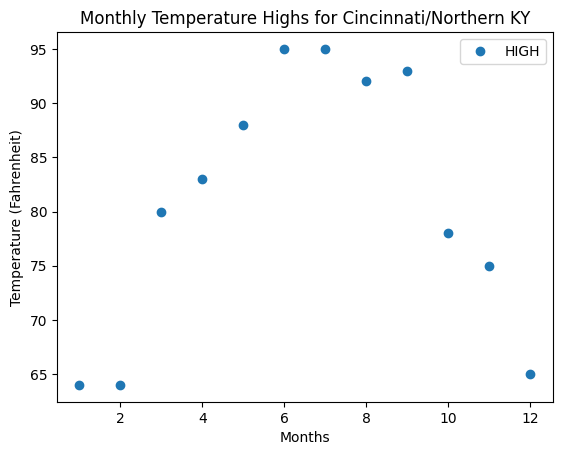

(      HIGH
 DATE      
 1       64
 2       64
 3       80
 4       83
 5       88
 6       95
 7       95
 8       92
 9       93
 10      78
 11      75
 12      65,
       LOW
 DATE     
 1       3
 2      12
 3      15
 4      29
 5      43
 6      53
 7      59
 8      58
 9      40
 10     29
 11     15
 12     -8)

In [142]:
plt.plot(Cin_NKY_monthly_max, 'o') 
plt.xlabel('Months')
plt.ylabel('Temperature (Fahrenheit)')     
plt.title('Monthly Temperature Highs for Cincinnati/Northern KY') 
plt.legend(Cin_NKY_monthly_max) 
#plt.axis([0, 13, 10, 95]) 

plt.show() 
Cin_NKY_monthly_max, Cin_NKY_monthly_min

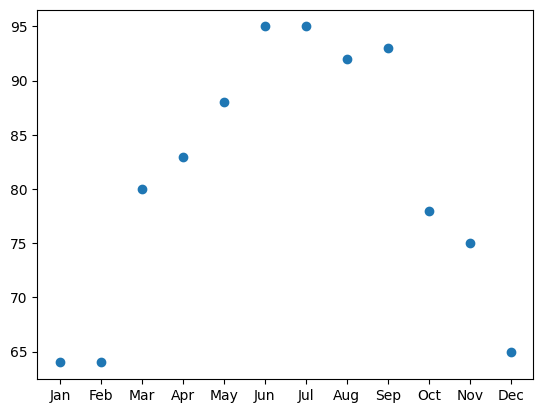

In [146]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
high_temps = [64, 64, 80, 83, 88, 95, 95, 92, 93, 78, 75, 65] 
#low_temps = [3, 12, 15, 29, 43, 53, 59, 58, 40, 29, 15, -8] 
#low_temps2 = Cin_NKY_monthly_min
plt.plot(months, Cin_NKY_monthly_max, 'o')  
plt.show() 


In [75]:
# Deleting Columns for the Louisville dataframe
df2_Louis_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 

In [76]:
df2_Louis_W.head() 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"LOUISVILLE INT AIRPORT, KY US",2022-01-01,2.08,0.0,61,64,55
1,"LOUISVILLE INT AIRPORT, KY US",2022-01-02,0.01,0.0,46,57,31
2,"LOUISVILLE INT AIRPORT, KY US",2022-01-03,0.00,0.0,31,37,25
3,"LOUISVILLE INT AIRPORT, KY US",2022-01-04,0.00,0.0,32,46,24
4,"LOUISVILLE INT AIRPORT, KY US",2022-01-05,0.00,0.0,46,50,30


In [77]:
#Deleting Columns for the New York City dataframe
df3_NYC_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 

In [78]:
df3_NYC_W.head() 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"JFK INT AIRPORT, NY US",2022-01-01,1.22,0.0,50,53,48
1,"JFK INT AIRPORT, NY US",2022-01-02,0.03,0.0,53,59,38
2,"JFK INT AIRPORT, NY US",2022-01-03,0.00,0.0,34,39,22
3,"JFK INT AIRPORT, NY US",2022-01-04,0.00,0.0,25,33,19
4,"JFK INT AIRPORT, NY US",2022-01-05,0.29,0.0,36,46,30


In [79]:
# Deleting Columns for the Los Angeles dataframe 
df4_LA_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 

In [80]:
df4_LA_W.head() 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"LAX AIRPORT, CA US",2022-01-01,0.0,NaN,55,61,49
1,"LAX AIRPORT, CA US",2022-01-02,0.0,NaN,54,66,45
2,"LAX AIRPORT, CA US",2022-01-03,0.0,NaN,53,60,44
3,"LAX AIRPORT, CA US",2022-01-04,0.0,NaN,52,60,44
4,"LAX AIRPORT, CA US",2022-01-05,0.0,NaN,54,65,45


In [81]:

#Renaming Louisville Columns
df2_Louis_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True)  

#Renaming New York City Columns
df3_NYC_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True)  

# Renaming Los Angeles Columns 
df4_LA_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True) 

# Calculations for Louisville Ky
Loui_monthly_mean = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean()  
Loui_monthly_max = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].max()
Loui_monthly_min = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].min() 
Loui_monthly_sum = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum() 

# Calculations for New York City
NYC_monthly_mean = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean() 
NYC_monthly_max = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].max() 
NYC_monthly_min = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].min() 
NYC_monthly_sum = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum() 

# Calculations for Los Angeles
LA_monthly_mean = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean() 
LA_monthly_max = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].max() 
LA_monthly_min = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].min() 
LA_monthly_sum = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum() 

LA_monthly_sum.round(1) # The round() function is used to return a floating number to a specified number of decimals. 

,SNOW,PRECIPITATION
DATE,,
1,0.0,0.1
2,0.0,0.0
3,0.0,1.1
4,0.0,0.2
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.1


In [82]:
# Replacing NaN with 0 in LA dataframe
df4_LA_W['SNOW'] = df4_LA_W['SNOW'].fillna(0) # The fillna() function is used to fill NaN value with a specified value, in this case with a 0. 

In [83]:
df4_LA_W.head() 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"LAX AIRPORT, CA US",2022-01-01,0.0,0.0,55,61,49
1,"LAX AIRPORT, CA US",2022-01-02,0.0,0.0,54,66,45
2,"LAX AIRPORT, CA US",2022-01-03,0.0,0.0,53,60,44
3,"LAX AIRPORT, CA US",2022-01-04,0.0,0.0,52,60,44
4,"LAX AIRPORT, CA US",2022-01-05,0.0,0.0,54,65,45
